# Analýza dat

In [275]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import pandas as pd

In [276]:
n, m = 1000000, 3

arr = np.random.rand(n, m)
mean = np.mean(arr, axis=1)


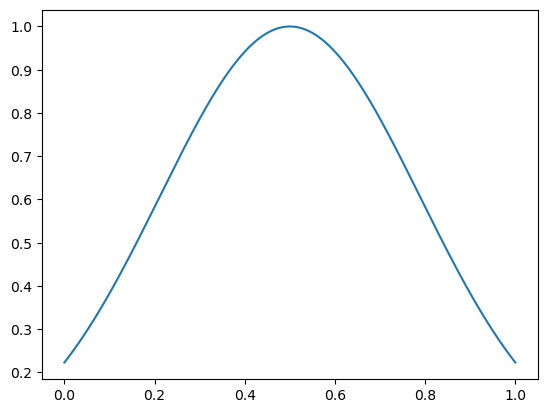

In [277]:
x = np.linspace(0, 1, 100000)
y = np.exp(-(x-x.mean())**2 / (2*x.std()**2) )
plt.plot(x, y, label='Gaussova křivka')
plt.show()

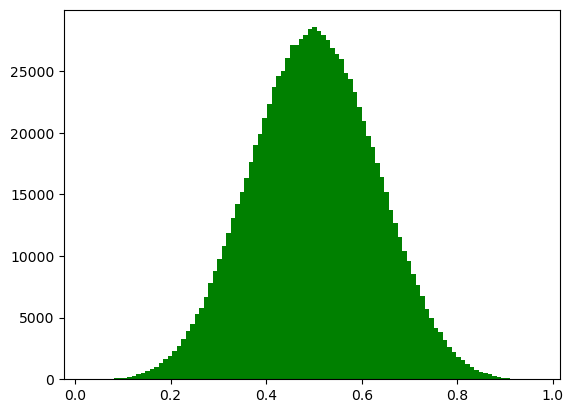

In [278]:
n, m = 1000000, 5
arr = np.random.rand(n, m)
mean = np.mean(arr, axis=1)

counts, bin_edges, patches = plt.hist(mean, bins=100, color='g', density=False, label='Histogram dat')

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

Fitované parametry:
Amplituda (A): 28474.68
Střední hodnota (mu): 0.499919
Směrodatná odchylka (sigma): 0.133179


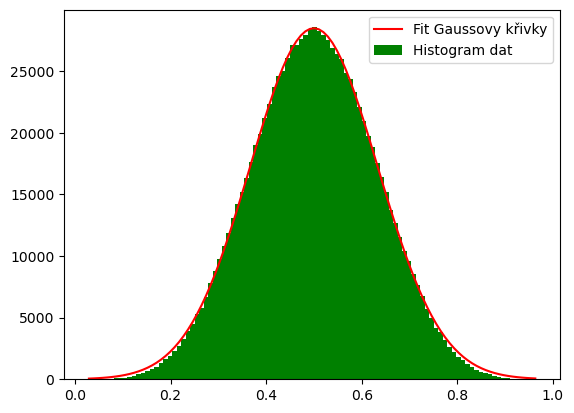

In [279]:
# 1. Definice Gaussovy (normální) funkce s amplitudou A
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[np.max(counts), np.mean(mean), np.std(mean)])

A_fit, mu_fit, sigma_fit = popt

# Tisk výsledků fitu
print(f"Fitované parametry:")
print(f"Amplituda (A): {A_fit:.2f}")
print(f"Střední hodnota (mu): {mu_fit:.6f}")
print(f"Směrodatná odchylka (sigma): {sigma_fit:.6f}")
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Fit Gaussovy křivky')
plt.hist(mean, bins=100, color='g', density=False, label='Histogram dat')
plt.legend()
plt.show()

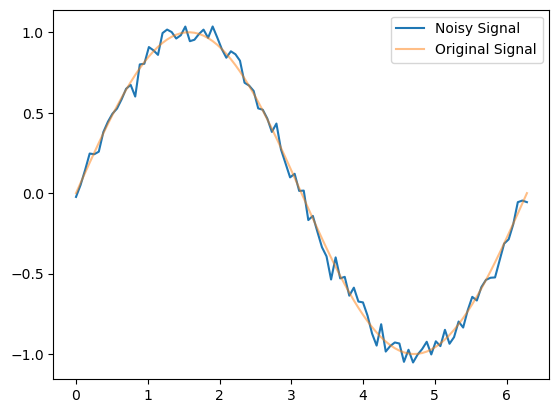

In [280]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
y_noisy = y + np.random.normal(0, 0.05, size=y.shape)
plt.plot(x, y_noisy, label='Noisy Signal')
plt.plot(x, y, label='Original Signal', alpha=0.5)
plt.legend()
plt.show()

In [281]:
# 1. Vytvoření ukázkové datové řady
data = pd.Series(y_noisy)
window_size = 10  # Velikost okna pro klouzavý průměr

sin_y = pd.Series(y)

print(f"Původní data:\n{data}\n")

# 3. Klouzavý průměr (Centered/Centrovaný)
# center=True nastaví průměr doprostřed okna.
moving_avg_centered = data.rolling(window=window_size, center=True, min_periods=1).mean()

print(f"\nKlouzavý průměr (window={window_size}, Centered):\n{moving_avg_centered}")

Původní data:
0    -0.023448
1     0.050772
2     0.144161
3     0.246082
4     0.241837
        ...   
95   -0.286742
96   -0.193159
97   -0.056090
98   -0.046034
99   -0.056009
Length: 100, dtype: float64


Klouzavý průměr (window=10, Centered):
0     0.131881
1     0.152836
2     0.185219
3     0.217510
4     0.248181
        ...   
95   -0.295886
96   -0.268849
97   -0.236712
98   -0.195695
99   -0.158643
Length: 100, dtype: float64


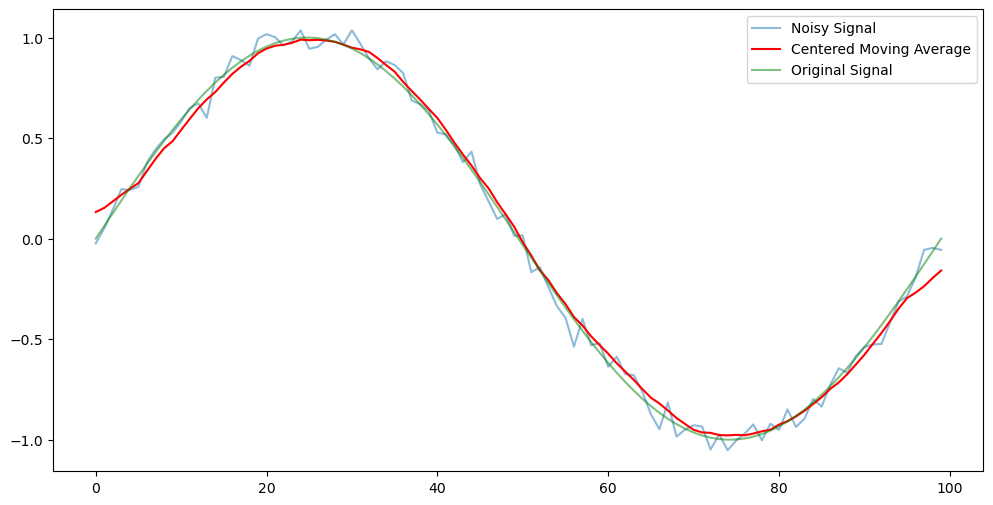

In [282]:
plt.subplots(figsize=(12, 6)) 
plt.plot(data, label='Noisy Signal', alpha=0.5)
plt.plot(moving_avg_centered, label='Centered Moving Average', color='red')
plt.plot(sin_y, label='Original Signal', alpha=0.5, color='green')
plt.legend()
plt.show()

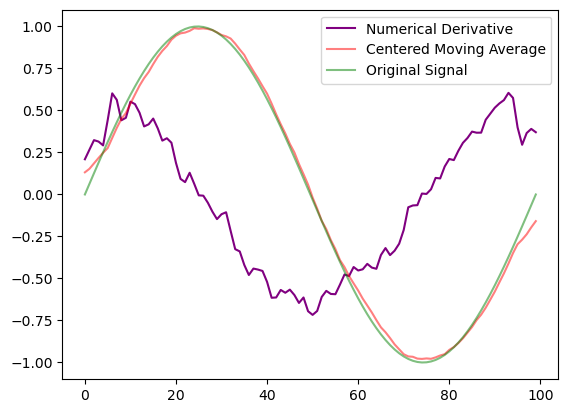

In [283]:
def numerical_derivative(data, dx=0.1):
    data = np.asarray(data)
    derivative = np.zeros_like(data)
    
    # Centrální diference pro vnitřní body
    derivative[1:-1] = (data[2:] - data[:-2]) / (2 * dx)
    
    # Jednostranné diference pro okrajové body
    derivative[0] = (data[1] - data[0]) / dx  # Přední diference
    derivative[-1] = (data[-1] - data[-2]) / dx  # Zadní diference
    
    return derivative

numerical_derivative_values = numerical_derivative(moving_avg_centered)
plt.plot(numerical_derivative_values, label='Numerical Derivative', color='purple')
plt.plot(moving_avg_centered, label='Centered Moving Average', color='red', alpha=0.5)
plt.plot(sin_y, label='Original Signal', alpha=0.5, color='green')
plt.legend()
plt.show()

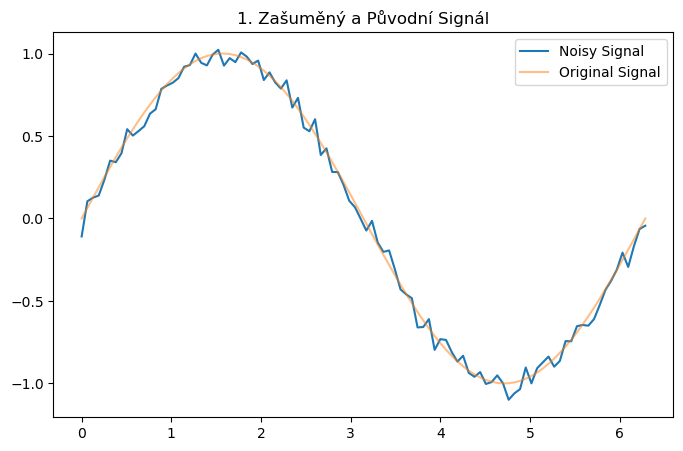

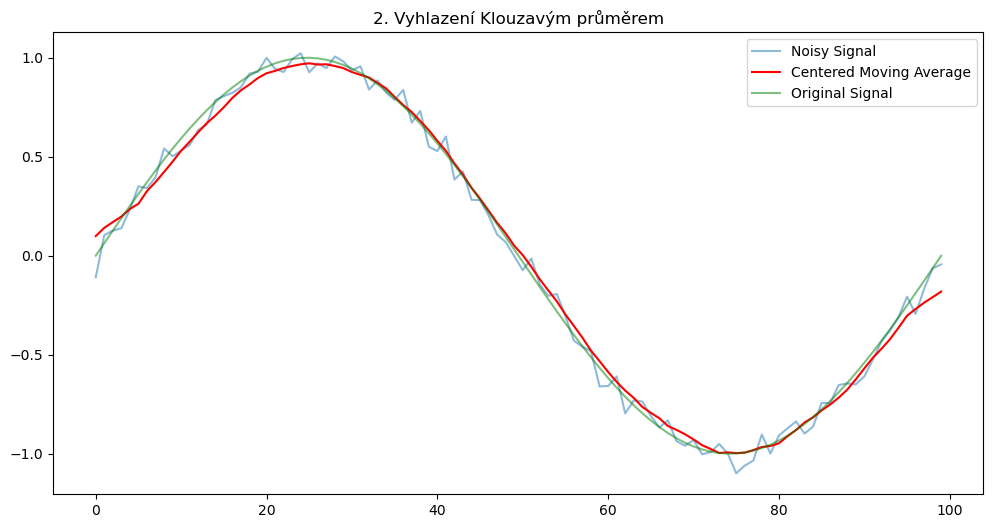

Skutečná hodnota dx: 0.0635


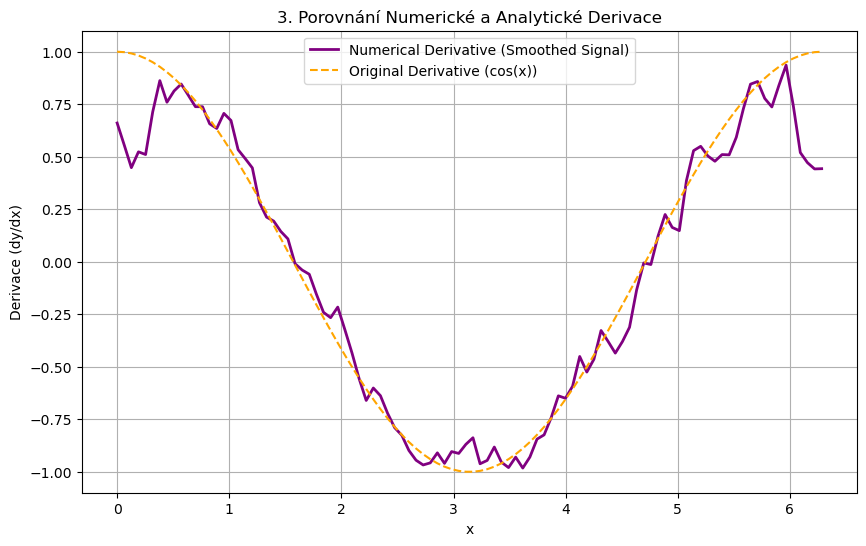

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Vytvoření ukázkové datové řady
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
y_noisy = y + np.random.normal(0, 0.05, size=y.shape)

plt.figure(figsize=(8, 5))
plt.plot(x, y_noisy, label='Noisy Signal')
plt.plot(x, y, label='Original Signal', alpha=0.5)
plt.title('1. Zašuměný a Původní Signál')
plt.legend()
plt.show()

# --- Redukce šumu (Klouzavý průměr) ---
data = pd.Series(y_noisy)
window_size = 10 
sin_y = pd.Series(y)

# Klouzavý průměr (Centered/Centrovaný)
# min_periods=1 řeší okraje
moving_avg_centered = data.rolling(window=window_size, center=True, min_periods=1).mean()

plt.figure(figsize=(12, 6)) 
plt.plot(data, label='Noisy Signal', alpha=0.5)
plt.plot(moving_avg_centered, label='Centered Moving Average', color='red')
plt.plot(sin_y, label='Original Signal', alpha=0.5, color='green')
plt.title('2. Vyhlazení Klouzavým průměrem')
plt.legend()
plt.show()

# --- Numerická Derivace ---

# **OPRAVA DŮLEŽITÁ:** Vypočítáme skutečný krok dx z pole x
dx_value = x[1] - x[0] 
print(f"Skutečná hodnota dx: {dx_value:.4f}")

def numerical_derivative(data, dx, axis=None):
    """
    Numerická derivace 1D, 2D nebo 3D pole.
    - Pro 1D (Series/1D np.array) vrací 1D pole derivací.
    - Pro 2D a axis=None vrací dvojici (d/dx, d/dy) kde:
        d/dx -> změny podél sloupců (os=1)
        d/dy -> změny podél řádků  (os=0)
    - Pro 3D podporujeme pouze axis=None — vrací trojici (d/dx, d/dy, d/dz)
      kde:
        d/dx -> změny podél poslední osy (os=2)
        d/dy -> změny podél střední osy (os=1)
        d/dz -> změny podél první osy (os=0)
    - dx může být skalár (stejný krok pro všechny osy) nebo iterable s třemi prvky
      (dx_x, dx_y, dx_z) pro 3D.
    """
    arr = np.asarray(data, dtype=float)

    # Normalize dx for possible per-axis specification
    if np.isscalar(dx):
        dx_x = dx_y = dx_z = float(dx)
    else:
        # allow sequences of length 2 or 3 (2 -> x,y for 2D; 3 -> x,y,z for 3D)
        dx_seq = tuple(dx)
        if len(dx_seq) == 2:
            dx_x, dx_y = map(float, dx_seq)
            dx_z = dx_x
        elif len(dx_seq) == 3:
            dx_x, dx_y, dx_z = map(float, dx_seq)
        else:
            raise ValueError("dx must be scalar or sequence of length 2 or 3")

    # 1D case
    if arr.ndim == 1:
        deriv = np.zeros_like(arr)
        deriv[1:-1] = (arr[2:] - arr[:-2]) / (2 * dx_x)
        deriv[0] = (arr[1] - arr[0]) / dx_x
        deriv[-1] = (arr[-1] - arr[-2]) / dx_x
        return deriv

    # 2D case
    if arr.ndim == 2:
        if axis is None:
            # derivative w.r.t. x (along columns, axis=1)
            dx_arr = np.zeros_like(arr)
            dx_arr[:, 1:-1] = (arr[:, 2:] - arr[:, :-2]) / (2 * dx_x)
            dx_arr[:, 0] = (arr[:, 1] - arr[:, 0]) / dx_x
            dx_arr[:, -1] = (arr[:, -1] - arr[:, -2]) / dx_x

            # derivative w.r.t. y (along rows, axis=0)
            dy_arr = np.zeros_like(arr)
            dy_arr[1:-1, :] = (arr[2:, :] - arr[:-2, :]) / (2 * dx_y)
            dy_arr[0, :] = (arr[1, :] - arr[0, :]) / dx_y
            dy_arr[-1, :] = (arr[-1, :] - arr[-2, :]) / dx_y

            return dx_arr, dy_arr
        else:
            raise ValueError("For 2D data, axis must be None (returns both derivatives).")

    # 3D case
    if arr.ndim == 3:
        if axis is None:
            # derivative w.r.t. x (along last axis, axis=2)
            dx_arr = np.zeros_like(arr)
            dx_arr[..., 1:-1] = (arr[..., 2:] - arr[..., :-2]) / (2 * dx_x)
            dx_arr[..., 0] = (arr[..., 1] - arr[..., 0]) / dx_x
            dx_arr[..., -1] = (arr[..., -1] - arr[..., -2]) / dx_x

            # derivative w.r.t. y (along middle axis, axis=1)
            dy_arr = np.zeros_like(arr)
            dy_arr[:, 1:-1, :] = (arr[:, 2:, :] - arr[:, :-2, :]) / (2 * dx_y)
            dy_arr[:, 0, :] = (arr[:, 1, :] - arr[:, 0, :]) / dx_y
            dy_arr[:, -1, :] = (arr[:, -1, :] - arr[:, -2, :]) / dx_y

            # derivative w.r.t. z (along first axis, axis=0)
            dz_arr = np.zeros_like(arr)
            dz_arr[1:-1, :, :] = (arr[2:, :, :] - arr[:-2, :, :]) / (2 * dx_z)
            dz_arr[0, :, :] = (arr[1, :, :] - arr[0, :, :]) / dx_z
            dz_arr[-1, :, :] = (arr[-1, :, :] - arr[-2, :, :]) / dx_z

            return dx_arr, dy_arr, dz_arr
        else:
            raise ValueError("For 3D data only axis=None is supported (compute derivatives in x,y,z simultaneously).")

    raise ValueError("numerical_derivative supports only 1D, 2D or 3D arrays")

# Aplikace numerické derivace se SPRÁVNÝM dx
numerical_derivative_values = numerical_derivative(moving_avg_centered, dx=dx_value)

# Analytická derivace pro kontrolu (Derivace sin(x) je cos(x))
analytical_derivative = np.cos(x)


# Zobrazení výsledku
plt.figure(figsize=(10, 6))
plt.plot(x, numerical_derivative_values, label='Numerical Derivative (Smoothed Signal)', color='purple', linewidth=2)
plt.plot(x, analytical_derivative, label='Original Derivative (cos(x))', color='orange', linestyle='--')
plt.title('3. Porovnání Numerické a Analytické Derivace')
plt.xlabel('x')
plt.ylabel("Derivace (dy/dx)")
plt.legend()
plt.grid(True)
plt.show()

Rozšíření ve dvou dimenzích Z(x,y) = cos(x)*sin(y) + šum výsledek jako nxn pole (x udělat jako matici se řádky 0,1, 0,2) a y udělat jako sloupcovou matici s 0,1, 0,2 a udělat bitmapu a zobrait 
Vykreslit pole šipeček jako gradientu derivace podle x a podle y

np.meshgrid - kombinace jednoho lineárního pole do dvou polí
zobrazení imshow - 
quiver - vektorové pole
Zobrazit gravitační pole Země a antizemě s obrácenou gravitací
Zkusit změřit rozdíl času když použiji numpy pole vs for cykly

In [289]:
max = 5
points = 20

x, y = np.meshgrid(np.linspace(0, max, points), np.linspace(0, max, points))
z = 1/np.sqrt((x-max/4)**2 + (y-max/2)**2 + 1) - 1/np.sqrt((x-3*max/4)**2 + (y-max/2)**2 + 1)
z_der = numerical_derivative(z, dx=(max/points), axis=None)
z_der_x, z_der_y = z_der

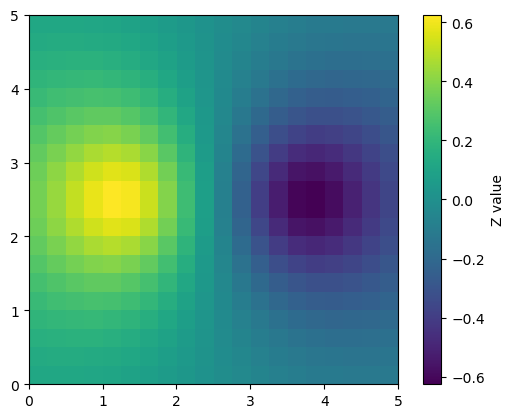

In [290]:
plt.imshow(z, cmap='viridis', extent=(0, max, 0, max), origin='lower')
plt.colorbar(label='Z value')
plt.show()

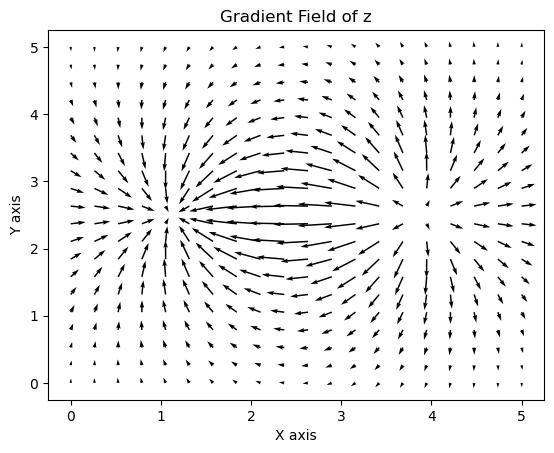

In [291]:
plt.quiver(x, y, z_der_x, z_der_y)
plt.title('Gradient Field of z')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

Text(0.5, 1.0, 'Gradient Field of r at slice')

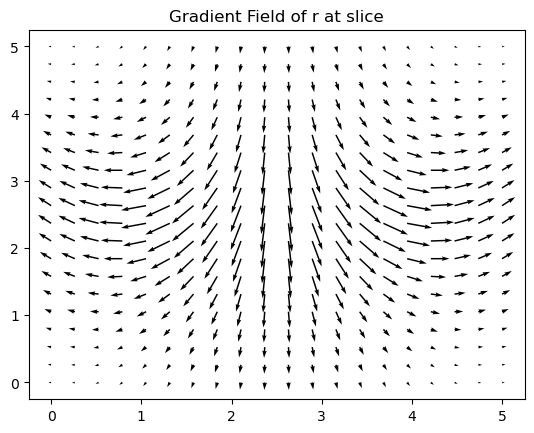

In [296]:
x, y, z = np.meshgrid(np.linspace(0, max, points), np.linspace(0, max, points), np.linspace(0, max, points))
r = 1/np.sqrt((x-max/4)**2 + (y-max/2)**2 + z**2 + 1) - 1/np.sqrt((x-3*max/4)**2 + (y-max/2)**2 + z**2 + 1)
r_der = numerical_derivative(r, dx=(max/points), axis=None)
r_der_x, r_der_y, r_der_z = r_der

plt.quiver(x[:, :, 5], y[:, :, 5], r_der_x[:, :, 5], r_der_y[:, :, 5])
plt.title('Gradient Field of r at slice')